<a href="https://colab.research.google.com/github/xDrokra/Diabetes-Prediction-ML/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Project
This project focuses on leveraging machine learning techniques in the healthcare domain to predict diabetes in patients. The goal is to identify individuals at risk of diabetes based on factors such as glucose levels, insulin, BMI, and age, providing insights that could support early intervention and medical decision-making.

## About the Dataset
The dataset used is the Pima Indian Diabetes Dataset, sourced from Kaggle. It contains 768 entries and 9 attributes, encompassing patient information and health metrics.

### Data Dictionary

| Feature  | Description |
| -------  | ----------  |
| Pregnancies | Number of times the patient has been pregnant |
| Glucose | Plasma glucose concentration during a 2-hour oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skinfold thickness (mm) |
| Insulin | 2-hour serum insulin (mu U/ml) |
| BMI | Body Mass Index, a measure of weight relative to height |
| DiabetesPedigreeFunction | A function assessing diabetes likelihood based on family history |
| Age | Age of the patient in years |
| Outcome | Binary label indicating the presence (1) or absence (0) of diabetes |

This dataset provides a mix of numerical features and a clear target variable, making it well-suited for classification tasks. The project explores various machine learning algorithms, evaluates their performance, and identifies key health indicators influencing diabetes prediction.


In [ ]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Preprocessing
The data preprocessing stage was crucial to prepare the dataset for training machine learning models. Initially, missing values in features such as glucose, blood pressure, insulin, BMI, and skin thickness were replaced with their respective means to handle incomplete records. Duplicate rows, if any, were removed to ensure data quality.

The data imbalance, with significantly more non-diabetic cases (500) than diabetic ones (268), was addressed after the exploratory data analysis (EDA) phase to preserve the original distribution for visualization. To balance the datase the SMOTE technique was applied, generating synthetic samples for the minority class.

In [ ]:
# loading the dataset
df = pd.read_csv('./sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# shape of the dataset [rows, columns]
df.shape

(768, 9)

In [ ]:
# checking duplicated
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
# Check for missing value and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Checking the count of 0 value in the variables columns
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in variables:
  c = 0
  for x in df[i]:
    if x == 0:
      c += 1
  print(i, c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [ ]:
# Replacing the 0 value of the columns with the mean
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in variables:
  df[i] = df[i].replace(0, df[i].mean())

for i in variables:
  c = 0
  for x in df[i]:
    if x == 0:
      c += 1
  print(i, c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


# Exploratory Data Analysis
In the exploratory data analysis, I will examine the data distribution, assess feature correlations, and explore the relationships between the features and the target variable. Initially, I will focus on analyzing the data distribution, followed by investigating the connections between the target variable and the independent variables.

In [ ]:
# statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking outcome of the data 1 = diabetic 0 = non diabetic
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


## Diabetes and Age

<Axes: xlabel='Age', ylabel='Count'>

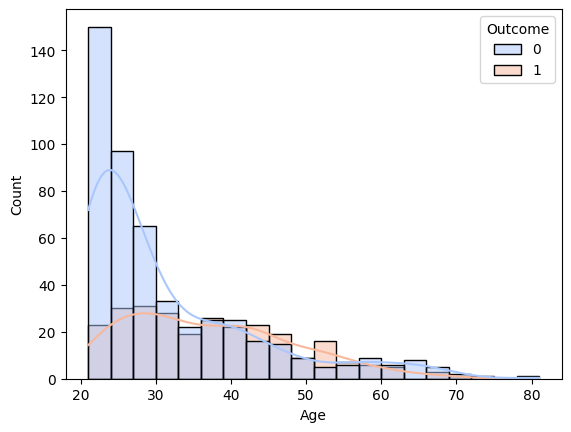

In [ ]:
sns.histplot(df, x='Age', hue='Outcome', kde=True, bins=20, palette='coolwarm')


The graph indicates that individuals aged 40-55 are more likely to develop diabetes compared to other age groups. However, since there is a higher number of adults in the 20-30 age range, the total number of diabetes cases in this group appears higher than in other age groups.

## Pregnancies and Diabetes

Text(0.5, 1.0, 'Pregnancies vs Diabetes')

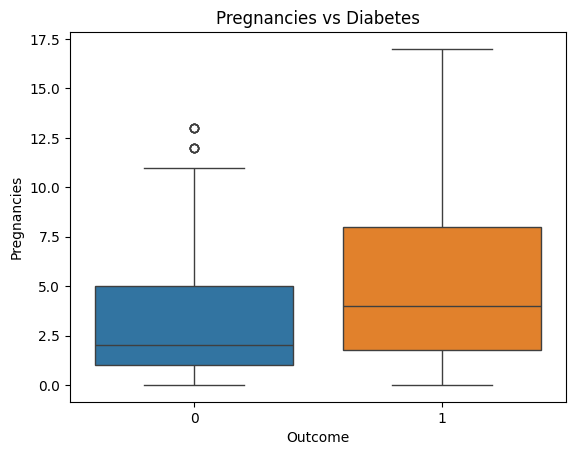

In [ ]:
sns.boxplot(x='Outcome',y='Pregnancies',data=df, hue='Outcome', legend=False).set_title('Pregnancies vs Diabetes')

This boxplot shows the relationship between the number of pregnancies and diabetes outcome. According to the graph increased number of pregnancies highlights increased risk of diabetes.

## Glucose and Diabetes

Text(0.5, 1.0, 'Glucose vs Diabetes')

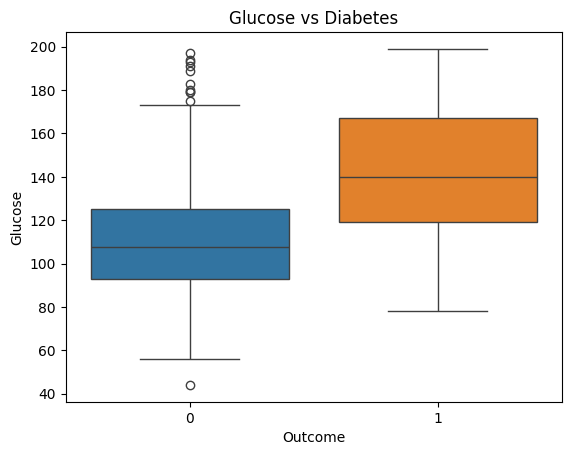

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df, hue='Outcome', legend=False).set_title('Glucose vs Diabetes')

This boxplot shows the relationship between the Glucose and diabetes outcome. We can see that a high glucose level plays a major role in diabetes. Patients with a glucose average greater than 140 are most likely diabetic. From here we understand that glucose is a very important indicator for diabetes

## Blood Pressure and Diabetes

Text(0.5, 1.0, 'Blood Pressure vs Diabetes')

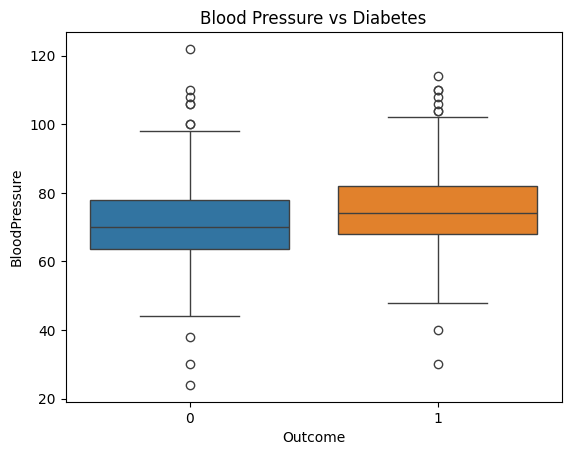

In [ ]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df, hue='Outcome', legend=False).set_title('Blood Pressure vs Diabetes')

We note that the median blood pressure for diabetic people is slightly higher than for non-diabetic people, but there is no clear evidence that blood pressure is such an important indicator in determining whether a person is diabetic.

## Skin Thickness and *Diabetes*

Text(0.5, 1.0, 'Skin Thickness vs Diabetes')

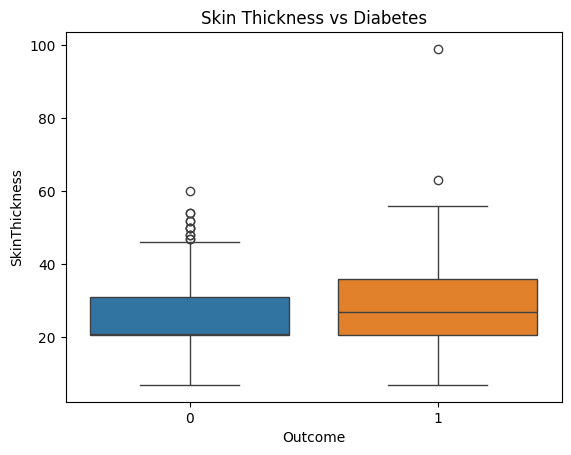

In [ ]:
sns.boxplot(x='Outcome', y='SkinThickness', data=df, hue='Outcome', legend=False).set_title('Skin Thickness vs Diabetes')

The median Skin tickness for diabetic people is much higher than for non-diabetic people. Where non-diabetic people have an average skin tickness of 20, diabetic people have an average of 30. Therefore, skin thickness can be a indicator of diabetes.

## BMI and Diabetes

Text(0.5, 1.0, 'BMI vs Diabetes')

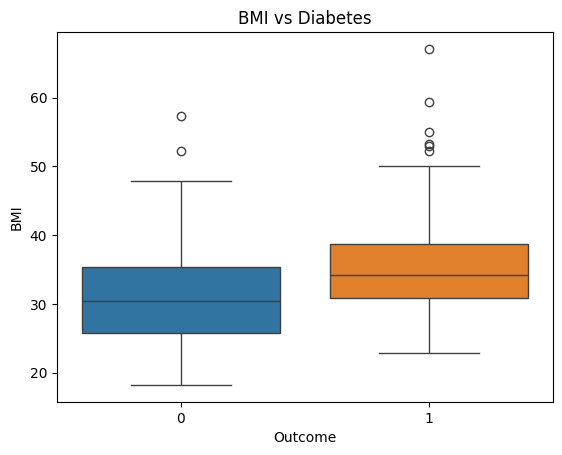

In [ ]:
sns.boxplot(x='Outcome',y='BMI', data=df, hue='Outcome', legend=False).set_title('BMI vs Diabetes')

The diabetic group has a slightly higher median BMI and a slightly wider range, with some outliers present in both groups. Higher BMI values appear more common in the diabetic group, suggesting a potential link between BMI and diabetes.

## Insuline and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

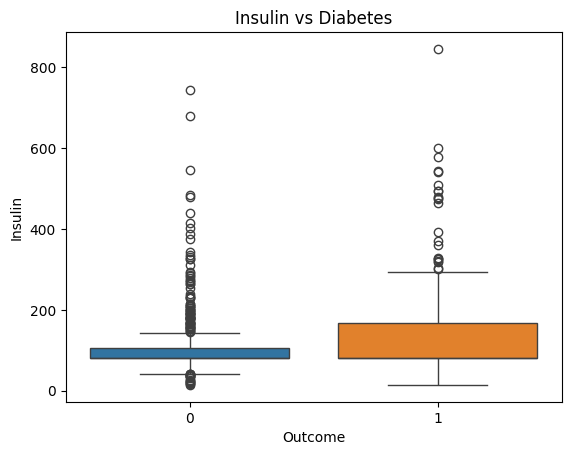

In [ ]:
sns.boxplot(x='Outcome', y='Insulin', data=df, hue='Outcome', legend=False).set_title('Insulin vs Diabetes')

We can see how insulin is an important indicator for the role of diabetes as we know insulin also influences glucose levels. Non-diabetic patients have an insulin level close to 100, while diabetic patients have an insulin level close to 200

## Diabetes pedigree function and Diabetes

Text(0.5, 1.0, 'Diabetes Pedigree Function vs Diabetes')

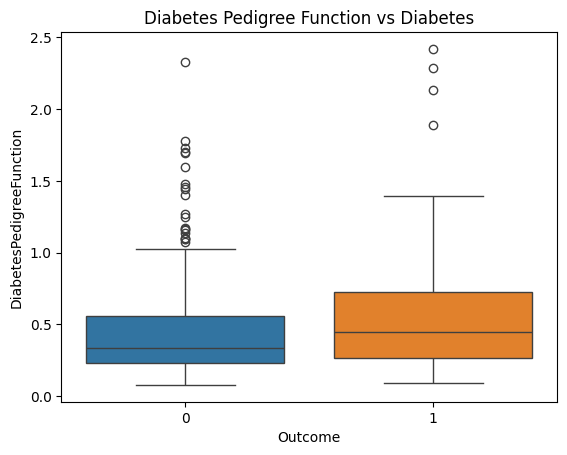

In [ ]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, hue='Outcome', legend=False).set_title('Diabetes Pedigree Function vs Diabetes')


The Diabetes Pedigree Function (DPF) estimates the likelihood of diabetes based on the individual's age and family history of diabetes. From the boxplot, it is evident that patients with lower DPF values are significantly less likely to have diabetes, while those with higher DPF values are more likely to be diabetic. This suggests that DPF is a good predictor of diabetes.

<Axes: >

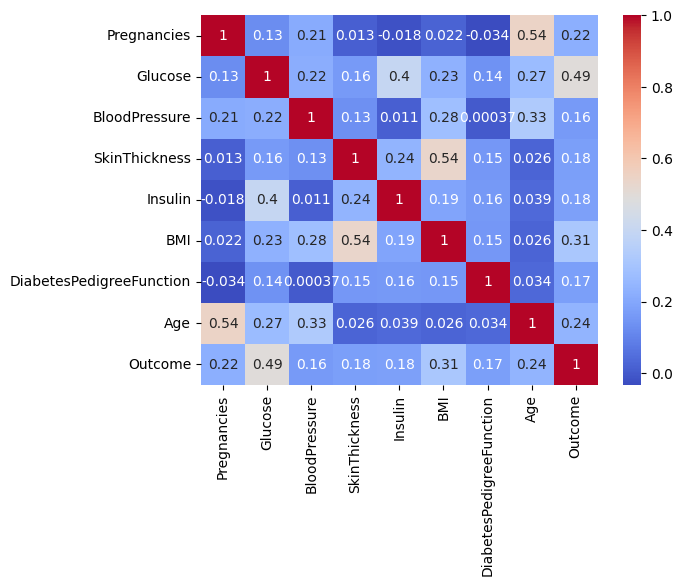

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Train Test Split
## Diabetes Model
for the prediction of the diabetes, i'll use the following algo:
- Logistic Regression
- Random Forest
- Decision Tree
- Support Vector Machine
- Gradient Boosting
- Bagging Classifier
- XGBoost

In [ ]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate new synthetic samples for the minority class for making the dataset balanced
smote = SMOTE(random_state=42)
X = df.drop('Outcome', axis=1)
Y = df['Outcome']
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Suddivisione del dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, stratify=Y_resampled, random_state=42)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)

## Logistic Regression

In [ ]:
# building model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)

In [ ]:
# training the model
lr.fit(X_train,y_train)
# training accuracy
lr.score(X_train,y_train)

0.74875

In [ ]:
prediction_lr = lr.predict(X_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [ ]:
# trainig model
rfc.fit(X_train, y_train)
# training accuracy
rfc.score(X_train, y_train)

1.0

In [ ]:
prediction_rfc = rfc.predict(X_test)
accuracy_score(prediction_rfc, y_test)

0.83

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
# training model
dtc.fit(X_train, y_train)
# training accuracy
dtc.score(X_train, y_train)

1.0

In [ ]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(prediction_dtc, y_test)

0.79

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
# training model
svc.fit(X_train, y_train)
# training accuracy
svc.score(X_train, y_train)

0.72625

In [ ]:
prediction_svc = svc.predict(X_test)
accuracy_score(prediction_svc, y_test)

0.72

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# training model
knn.fit(X_train, y_train)
# training accuracy
knn.score(X_train, y_train)

0.835

In [ ]:
prediction_knn = knn.predict(X_test)
accuracy_score(prediction_knn, y_test)

0.74

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
# training model
gb.fit(X_train, y_train)
# training accuracy
gb.score(X_train, y_train)

0.92625

In [ ]:
prediction_gb = gb.predict(X_test)
accuracy_score(prediction_gb, y_test)

0.82

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()

In [ ]:
# training model
bc.fit(X_train, y_train)
# training accuracy
bc.score(X_train, y_train)

0.9875

In [ ]:
prediction_bc = bc.predict(X_test)
accuracy_score(prediction_bc, y_test)

0.83

## XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

xgb = GradientBoostingClassifier()

In [ ]:
# training model
xgb.fit(X_train, y_train)
# training accuracy
xgb.score(X_train, y_train)

0.92625

In [ ]:
prediction_xgb = xgb.predict(X_test)
accuracy_score(prediction_xgb, y_test)

0.825

# Model evaluation

## Evaluation Logic Regression

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)

Y_pred = prediction_lr
Y_pred_prob = lr.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_lr = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.745
Precision: 0.7425742574257426
Recall: 0.75
F1-Score: 0.746268656716418
ROC-AUC Score: 0.8301


### Confusion Matrix

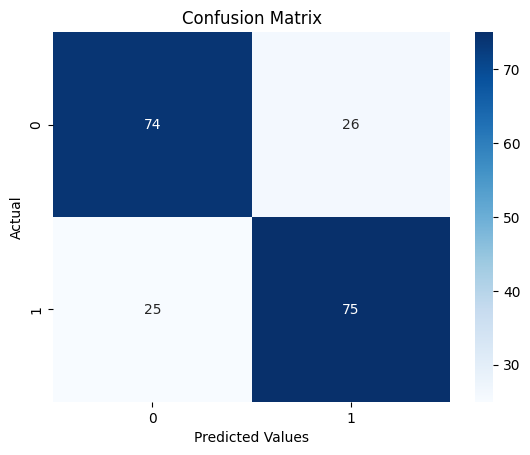

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       100
           1       0.74      0.75      0.75       100

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



## Evaluation Random Forest

In [ ]:
Y_pred = prediction_rfc
Y_pred_prob = rfc.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_rfc = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.83
Precision: 0.8
Recall: 0.88
F1-Score: 0.8380952380952381
ROC-AUC Score: 0.91275


### Confusion Matrix

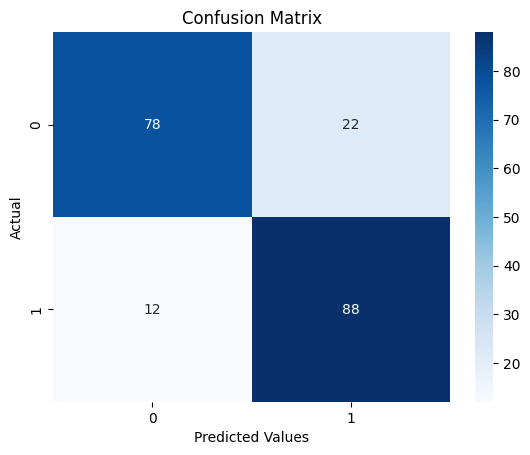

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.80      0.88      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



## Evaluation Decision Tree

In [ ]:
Y_pred = prediction_dtc
Y_pred_prob = dtc.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_dtc = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_dtc)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.79
Precision: 0.7843137254901961
Recall: 0.8
F1-Score: 0.7920792079207921
ROC-AUC Score: 0.79


### Confusion Matrix

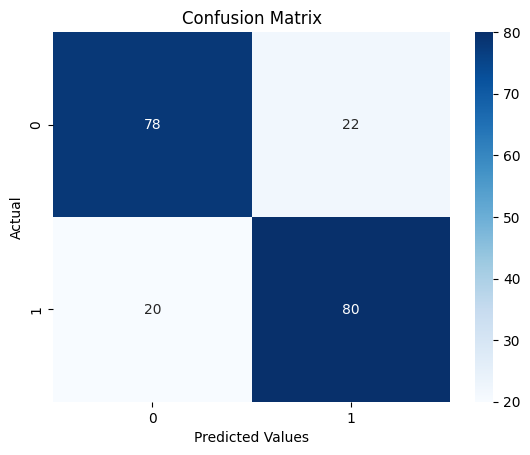

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.78      0.80      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



## Evaluation SVM

In [ ]:
Y_pred = prediction_svc
# Y_pred_prob = svc.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_svc = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_svc)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
# print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1-Score: 0.72


### Confusion Matrix

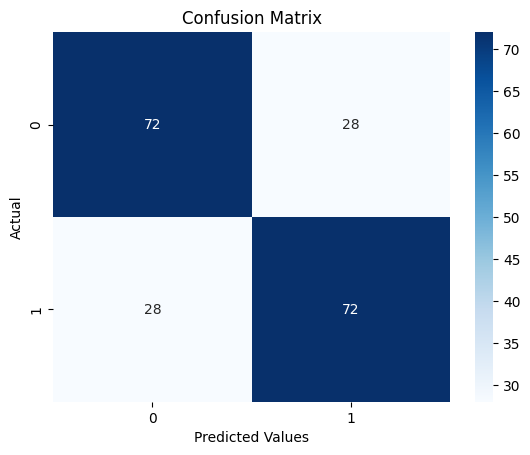

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       100
           1       0.72      0.72      0.72       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



## Evaluation K-Nearest Neighbors

In [ ]:
Y_pred = prediction_knn
Y_pred_prob = knn.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_knn = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.74
Precision: 0.7142857142857143
Recall: 0.8
F1-Score: 0.7547169811320755
ROC-AUC Score: 0.8204


### Confusion Matrix

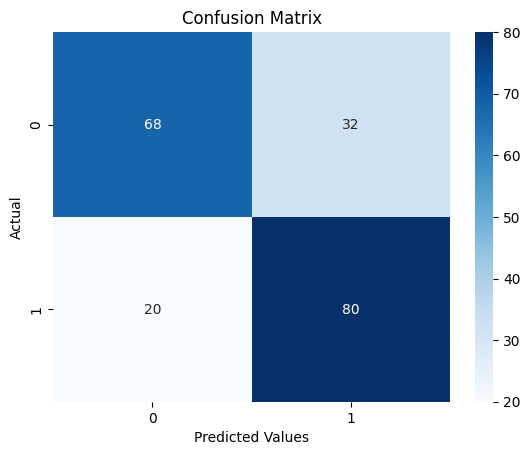

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       100
           1       0.71      0.80      0.75       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



## Evalutation Gradient Boosting

In [ ]:
Y_pred = prediction_gb
Y_pred_prob = gb.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_gb = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_gb)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.82
Precision: 0.7962962962962963
Recall: 0.86
F1-Score: 0.8269230769230769
ROC-AUC Score: 0.8818999999999999


### Confusion Matrix

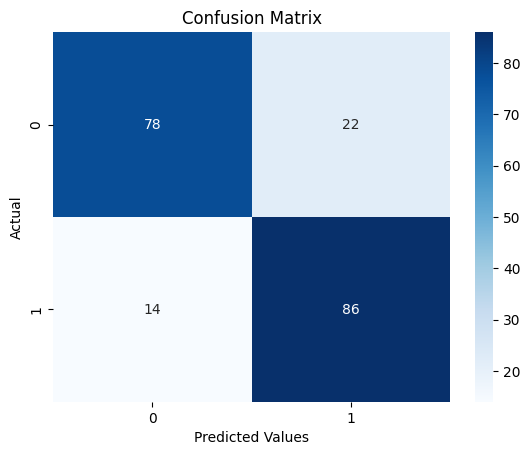

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.80      0.86      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



## Evalutation Bagging Classifier

In [ ]:
Y_pred = prediction_bc
Y_pred_prob = bc.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_bc = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_bc)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.83
Precision: 0.84375
Recall: 0.81
F1-Score: 0.826530612244898
ROC-AUC Score: 0.9056000000000001


### Confusion Matrix

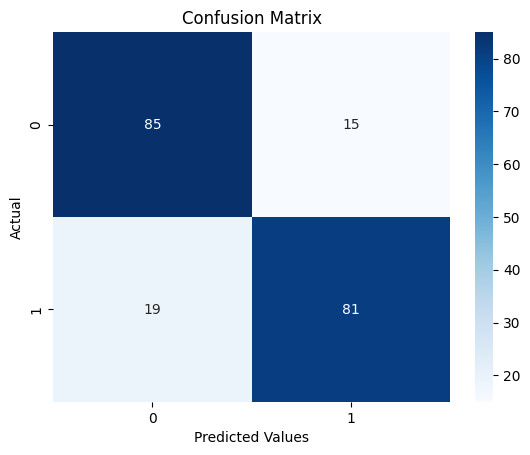

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.84      0.81      0.83       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



## Evalutation XGBoost

In [ ]:
Y_pred = prediction_xgb
Y_pred_prob = xgb.predict_proba(X_test)[:, 1]

### Model Prediction

In [ ]:
# model prediction
accuracy_xgb = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1-Score:", f1_score(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, Y_pred_prob))

Accuracy: 0.825
Precision: 0.8037383177570093
Recall: 0.86
F1-Score: 0.8309178743961353
ROC-AUC Score: 0.8833


### Confusion Matrix

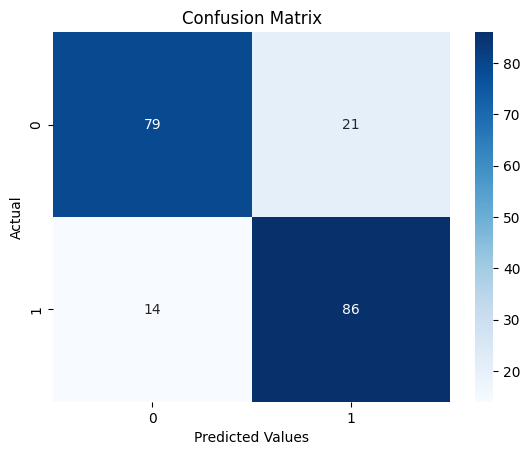

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [ ]:
# classification report
print("\nClassification Report:\n", classification_report(y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.80      0.86      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



# Comparing the Models

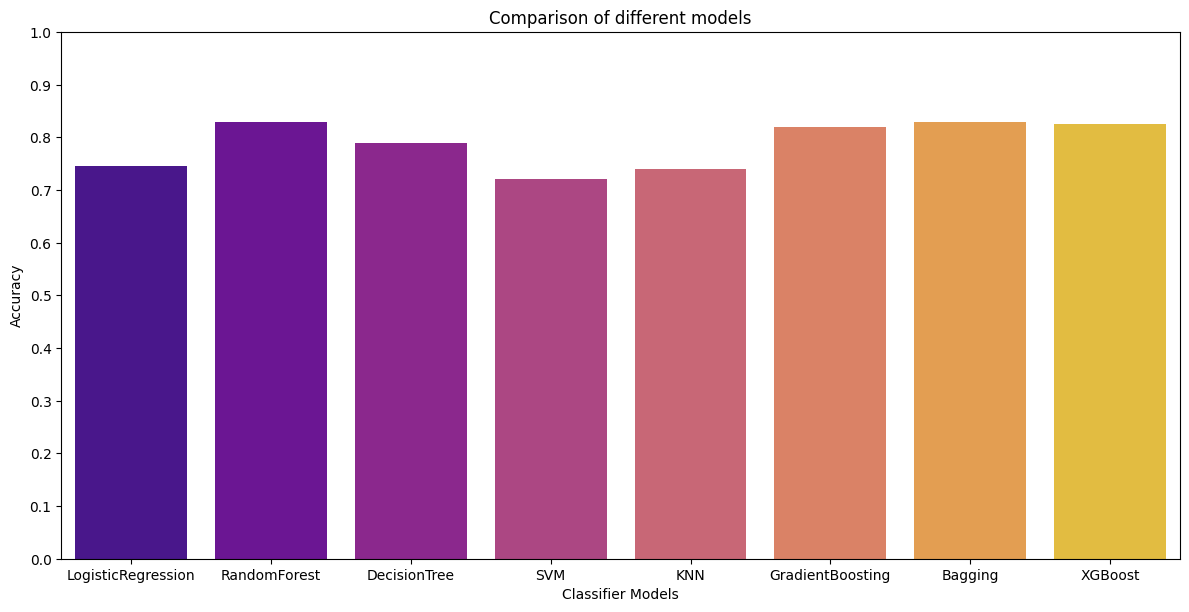

In [ ]:
#comparing the accuracy of different models
plt.figure(figsize=(12, 6))
ax = sns.barplot(palette='plasma',x=['LogisticRegression', 'RandomForest', 'DecisionTree', 'SVM', 'KNN', 'GradientBoosting', 'Bagging', 'XGBoost'], y=[accuracy_lr, accuracy_rfc, accuracy_dtc, accuracy_svc, accuracy_knn, accuracy_gb, accuracy_bc, accuracy_xgb])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('Comparison of different models')
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()


The graph shows the performance of various models based on their accuracy. The Random Forest, Bagging, and Gradient Boosting models achieved the highest accuracy at 0.83, closely followed by XGBoost with 0.825. The Decision Tree model performed moderately well with 0.79 accuracy. Logistic Regression and K-Nearest Neighbors (KNN) yielded similar results at 0.745 and 0.74, respectively. Support Vector Machine (SVM) had the lowest accuracy among the models, scoring 0.72. This comparison highlights that ensemble methods like Random Forest, Bagging, and Gradient Boosting generally outperform individual models in this task.

# Conclusion

In conclusion, this project investigated the prediction of diabetes using machine learning models, identifying key factors such as:
- glucose levels
- BMI
- skin thickness
- insulin (closely tied to glucose metabolism)
- pregnancies

as the most significant contributors to the outcome. These features reflect well-established medical insights into the risk factors for diabetes.

---

Among the models tested, Random Forest, Bagging, and Gradient Boosting emerged as the best-performing algorithms, each achieving an accuracy of 83%. These ensemble-based methods demonstrated their effectiveness in capturing complex relationships within the dataset.

---
The dataset used was relatively small (768 samples) and initially imbalanced, with more non-diabetic cases than diabetic ones. To address this, techniques like SMOTE were applied to balance the data, aiming for more reliable results. While this improved performance, further enhancements such as hyperparameter tuning, advanced feature selection, and testing on larger datasets could yield even better results.

This project demonstrates the importance of selecting key features and robust machine learning techniques in predicting medical conditions, highlighting the potential for these tools to contribute to healthcare advancements.